In [98]:
#imports and set up 
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [99]:
#load dataset into pandas df 
filename = "Ex1_Arrh1(2).csv"
df = pd.read_csv(filename)

#add additional columns 
df["1/T [K-1]"] = 1/df["T [K]"]
df["ln k"] = np.log(df["k [s-1]"])

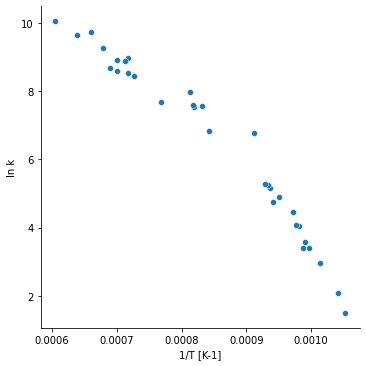

In [100]:
#plot data to preview 
sns.relplot(data=df, x="1/T [K-1]",y="ln k")

##### Linear regression analysis with dataset A (950 and 1653 K)

In [101]:
df.head()

,T [K],k [s-1],1/T [K-1],ln k
0,950,4.43,0.001053,1.488400
1,960,8.07,0.001042,2.088153
2,986,19.60,0.001014,2.975530
3,1003,29.80,0.000997,3.394508
4,1010,35.90,0.000990,3.580737


In [102]:
#import model from scikitlearn
from sklearn import linear_model

# create an instance of the model
model = linear_model.LinearRegression()

In [103]:
from sklearn import linear_model
model = linear_model.LinearRegression()

#set X and Y variables
X = df[["1/T [K-1]"]]
Y = df["ln k"]

#create test train split to conduct the regression analysis
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=42)

model.fit(x_train,y_train)

pred = model.predict(x_test)

In [104]:
#retrieve statistics
from sklearn.metrics import mean_squared_error, r2_score
print(f"The R2 score is: {r2_score(y_test,pred)}")
print(f"The RMSE score is: {mean_squared_error(y_test,pred, squared=False)}")
print (f"The intercept is: {model.intercept_}")
print (f"The gradient is: {model.coef_}")
print (f"Therefore, the actiation energy (kJ/mol) is {model.coef_*-8.314/1000}")

The R2 score is: 0.9556580158004967
The RMSE score is: 0.5345878494759038
The intercept is: 21.57495321970017
The gradient is: [-17867.9948476]
Therefore, the actiation energy (kJ/mol) is [148.55450916]


In [105]:
#standard error attempt

import statsmodels.api as sm
ols = sm.OLS(pred, x_test)
ols_result = ols.fit()
ols_result.summary()

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.757
Model:                            OLS   Adj. R-squared (uncentered):              0.730
Method:                 Least Squares   F-statistic:                              28.07
Date:                Wed, 16 Nov 2022   Prob (F-statistic):                    0.000495
Time:                        08:45:03   Log-Likelihood:                         -26.872
No. Observations:                  10   AIC:                                      55.74
Df Residuals:                       9   BIC:                                      56.05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
1/T [K-1]   7477.6598   1411.322      5.298      0.000    4285.027    1.07e+04
==============================================================================
Omnibus:                        2.003   Durbin-Watson:                   1.294
Prob(Omnibus):                  0.367   Jarque-Bera (JB):                0.830
Skew:                          -0.081   Prob(JB):                        0.660
Kurtosis:                       1.598   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Residuals for Dataset A')

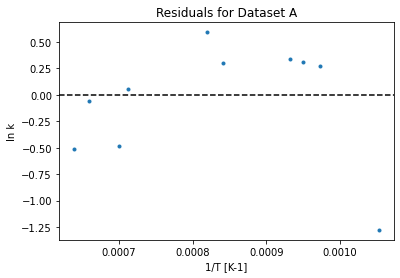

In [130]:
#create graphs to represent model fit

#residual plot 
fig, ax  = plt.subplots()

# Create a plot of residuals
ax.plot(x_test, y_test - pred,'.')

# Add a horizontal line at zero to guide the eye
ax.axhline(0, color='k', linestyle='dashed')

# Add axis labels
ax.set_xlabel("1/T [K-1]")
ax.set_ylabel("ln k")
ax.set_title("Residuals for Dataset A")

Text(0.5, 1.0, 'Actual Versus Predicted Results')

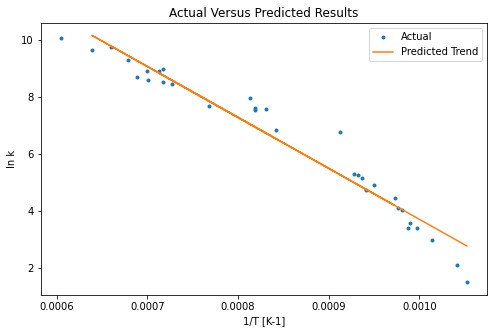

In [120]:
#actual versys predicted graph

fig, ax = plt.subplots(figsize=(8,5))
ax.plot(df["1/T [K-1]"], df["ln k"],'.')
ax.plot(x_test, pred)
ax.legend(['Actual', 'Predicted Trend'])

# Add axis labels
ax.set_xlabel("1/T [K-1]")
ax.set_ylabel("ln k")
ax.set_title( "Actual Versus Predicted Results")


##### Linear regression analysis with dataset B (950 and 1100 K)

In [85]:
#part 2 - analysis only with data between 950 and 1100 K 

#drop values 
df2 = df[df["T [K]"]< 1100]
df2

,T [K],k [s-1],1/T [K-1],ln k
0,950,4.43,0.001053,1.488400
1,960,8.07,0.001042,2.088153
2,986,19.60,0.001014,2.975530
3,1003,29.80,0.000997,3.394508
4,1010,35.90,0.000990,3.580737
5,1012,29.70,0.000988,3.391147
6,1019,56.40,0.000981,4.032469
7,1024,59.50,0.000977,4.085976
8,1028,87.10,0.000973,4.467057
9,1052,135.00,0.000951,4.905275


In [90]:
#conduct linear regression model with new data 

model2 = linear_model.LinearRegression()
X2 = df2[["1/T [K-1]"]]
Y2 = df2["ln k"]

x_train2, x_test2, y_train2, y_test2 = train_test_split(X2,Y2, test_size=0.3, random_state=42)

model2.fit(x_train2,y_train2)
pred2 = model2.predict(x_test2)

In [91]:
#retrieve statistics
from sklearn.metrics import mean_squared_error, r2_score
print(f"The R2 score is: {r2_score(y_test2,pred2)}")
print(f"The RMSE score is: {mean_squared_error(y_test2,pred2, squared=False)}")
print (f"The intercept is: {model2.intercept_}")
print (f"The gradient is: {model2.coef_}")
print (f"Therefore, the actiation energy (kJ/mol) is {model2.coef_*-8.314/1000}")

The R2 score is: 0.9631739141428445
The RMSE score is: 0.27780074311296526
The intercept is: 35.84513220451972
The gradient is: [-32485.67770613]
Therefore, the actiation energy (kJ/mol) is [270.08592445]


Text(0.5, 1.0, 'Residuals for Dataset B')

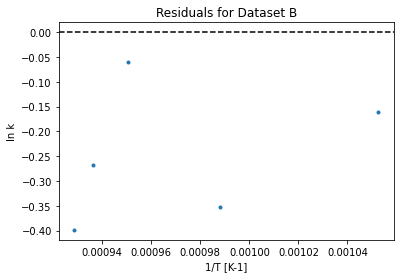

In [129]:
#residual plot 
fig, ax  = plt.subplots()

# Create a plot of residuals
ax.plot(x_test2, y_test2 - pred2,'.')

# Add a horizontal line at zero to guide the eye
ax.axhline(0, color='k', linestyle='dashed')

# Add axis labels
ax.set_xlabel("1/T [K-1]")
ax.set_ylabel("ln k")
ax.set_title("Residuals for Dataset B")

##### Question 2: Comparing Calculated Results to Experimental Data.

In [131]:
#load dataset into pandas df 
filename = "Ex1_Arrh2.csv"
data = pd.read_csv(filename)

#quick overview of data
data.head()

,Reference,Temp [K],A,Ea [kJ/mol],Order
0,1982FUR/PAC916-920,690 - 1040,3.160000e+15,276,1
1,1998DUB/LIF3299-3306,714 - 1250,8.130000e+15,279,1
2,1990HOH/KER1414-1417,690 - 750,8.040000e+14,268,1
3,1987HID/OKI212,1100 - 1450,4.600000e+14,262,1
4,1986RIC/ROG408-414,809 - 912,1.580000e+15,274,1


In [132]:
#summary of results

data["Ea [kJ/mol]"].describe()

count     27.000000
mean     269.518519
std       11.470264
min      230.000000
25%      268.500000
50%      272.000000
75%      275.000000
max      283.000000
Name: Ea [kJ/mol], dtype: float64

In [137]:
from sklearn.utils import resample
var = data["Ea [kJ/mol]"]        
results=[]
for nrepeat in range(20):  
    results.append(sample.median())
results = pd.Series(results)

print('Bootstrap Statistics:')
print(f'original: {var.median()}')
print(f'bootstrapped: {results.median()}')
print(f'bias: {results.mean() - var.median()}')
print(f'std. error: {results.std()}')

print(var.mean())

Bootstrap Statistics:
original: 272.0
bootstrapped: 274.0
bias: 2.0
std. error: 0.0
269.51851851851853


In [ ]:
#No change in results after bootstrapping